In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
import random
from PIL import Image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [5]:
(XTRAIN,YTRAIN),(XTEST,YTEST)=cifar10.load_data()

In [6]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
datagen.fit(XTRAIN)

In [7]:
XTRAIN.shape

(50000, 32, 32, 3)

In [8]:
print("XTRAIN",XTRAIN.shape)
print("YTRAIN",YTRAIN.shape)
print("XTEST",XTEST.shape)
print("YTEST",YTEST.shape)

XTRAIN (50000, 32, 32, 3)
YTRAIN (50000, 1)
XTEST (10000, 32, 32, 3)
YTEST (10000, 1)


In [9]:
YTRAIN=YTRAIN.reshape(-1,)
YTRAIN=YTRAIN.astype(int)
YTRAIN[:5]

array([6, 9, 9, 4, 1])

In [10]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [11]:
def plot_sample(X,Y,index):
  plt.figure(figsize=(2,2))
  plt.imshow(X[index])
  plt.xlabel(classes[int(Y[index])])

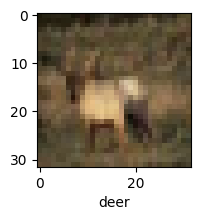

In [12]:
plot_sample(XTRAIN,YTRAIN,3)


In [13]:
XTEST=XTEST/255.0
XTRAIN=XTRAIN/255.0

In [17]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [51]:
model.compile(optimizer='adam', loss='SparseCategoricalCrossentropy',metrics=['accuracy'])

In [52]:
history = model.fit(XTRAIN, YTRAIN, epochs=1)


1563/1563 [==============================] - 8s 5ms/step - loss: 0.4950 - accuracy: 0.8253


In [53]:
test_loss,predict=model.evaluate(XTEST,YTEST)

313/313 [==============================] - 1s 3ms/step - loss: 1.0259 - accuracy: 0.6950


1/1 [==============================] - 0s 55ms/step


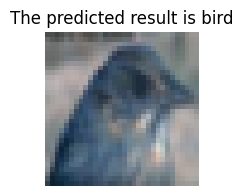

In [54]:
rand=random.randint(1,len(XTEST))
random_image=XTEST[rand]
label = np.argmax(YTEST[rand])
plt.figure(figsize=(2, 2))
prediction=model.predict(np.expand_dims(random_image,axis=0))
predicted_class=int(np.argmax(prediction))

plt.imshow(random_image)
plt.title(f"The predicted result is {classes[predicted_class]}")
plt.axis("off")
plt.show()

In [55]:
model.save("C:\\Users\\User\\Desktop\\tenserflow\\cnn_saved_model_.h5")

In [56]:
model.save("C:\\Users\\User\\Desktop\\tenserflow\\cnn_saved_model.keras")

In [60]:
print(tf.test.is_built_with_cuda())  # True ആണെങ്കിൽ CUDA support ഉണ്ട്


False
